In [ ]:
#Steps to build a neural network 
#1. Empty Model (Sequential /Model)
#2. Add the Input Layer (Dense/Input)
#3. Add the Hidden Layers(upto n)(Dense /Dropout/L5TM)
#4. Add the Output Layers
#5. Compile the model (model configuration parameters such as Optimizers, loss functions, performance Metrics)
#6. Train the model

In [ ]:
import tensorflow.keras.datasets as kd

In [ ]:
data = kd.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
(xtrain,ytrain),(xtest,ytest) = data

In [ ]:
xtrain.shape  #28 by 28 ki images 60000 images

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

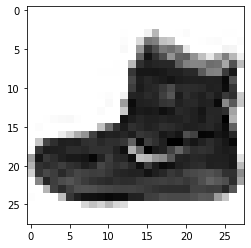

In [33]:
plt.imshow(xtrain[0,:,:],cmap='gray_r')

In [34]:
ytrain[0]

9

In [37]:
labl = '''0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker 
8 Bag
9 Ankle-boot'''.split('\n')
labels = {int(i.split()[0]):i.split()[-1] for i in labl}
labels


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle-boot'}

In [40]:
labels.get(ytrain[0])

'Ankle-boot'

In [41]:
xtrain1 = xtrain.reshape(-1,28*28)
xtest1 = xtest.reshape(-1,28*28)

In [43]:
xtrain.shape

(60000, 28, 28)

In [47]:
model_ann = Sequential()
model_ann.add(Dense(units=128,input_shape=(784,),activation='relu'))
model_ann.add(Dense(units=128,activation='relu'))
model_ann.add(Dense(units=10,input_shape=(784,),activation='softmax'))
model_ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])





In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
#(784*128)+128 = 1st layer 
#(128*128)+128 = 2nd layer 
#3rd layer = (128*10)+10

In [49]:
history = model_ann.fit(xtrain1,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8459 - accuracy: 0.7365
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6494 - accuracy: 0.7878
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5632 - accuracy: 0.8107
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5111 - accuracy: 0.8266
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4617 - accuracy: 0.8411
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4318 - accuracy: 0.8490
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4080 - accuracy: 0.8537
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8537
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8586
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.387

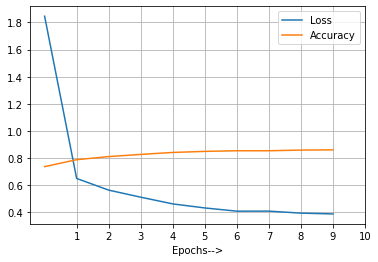

In [50]:
plt.plot(history.history['loss'])

plt.grid()
plt.legend(['Loss'])
plt.xticks(range(1,11))
plt.xlabel('Epochs-->')
plt.show()

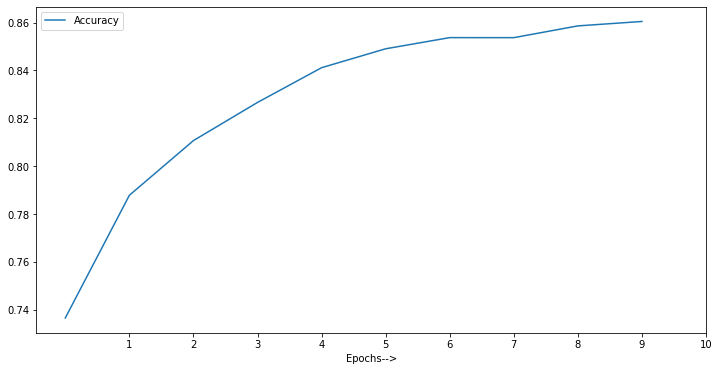

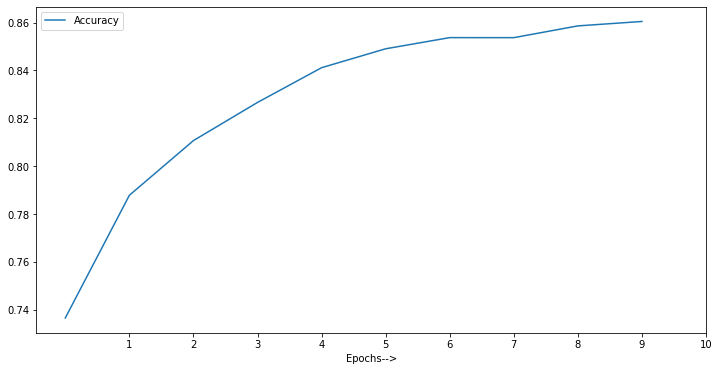

In [52]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.legend(['Accuracy'])
plt.xticks(range(1,11))
plt.xlabel('Epochs-->')
plt.show()

In [54]:
ypred = model_ann.predict(xtest1)

In [57]:
ypred[0].argmax()

9

In [56]:
labels.get(ytest[0])

'Ankle-boot'

In [58]:
labels.get(ypred[0].argmax())

'Ankle-boot'

In [59]:
labels.get(ypred[13].argmax())

'Dress'

In [60]:
for i,v in enumerate(ypred[13]):
  print(i,'t','(0:.10f)'.format(v))  # showing me the probability 

0 t (0:.10f)
1 t (0:.10f)
2 t (0:.10f)
3 t (0:.10f)
4 t (0:.10f)
5 t (0:.10f)
6 t (0:.10f)
7 t (0:.10f)
8 t (0:.10f)
9 t (0:.10f)


In [61]:
for i,v in enumerate(ypred[13]):
    print(labels.get(i),':','(0:.10f)'.format(v))  # showing me the probability 

T-shirt/top : (0:.10f)
Trouser : (0:.10f)
Pullover : (0:.10f)
Dress : (0:.10f)
Coat : (0:.10f)
Sandal : (0:.10f)
Shirt : (0:.10f)
Sneaker : (0:.10f)
Bag : (0:.10f)
Ankle-boot : (0:.10f)


In [62]:
from sklearn.metrics import classification_report 

In [63]:
model_ann.evaluate(xtest1,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.4671 - accuracy: 0.8372


[0.4670620560646057, 0.8371999859809875]

In [64]:
#score is 84 percent